In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 24 15:23:20 2020

@author: lmp61
"""

import os
#import sys
import numpy as np
import matplotlib.pyplot as plt
#import glob
%matplotlib ipympl
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
from pylab import cm
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.lines as mlines

testdir = '/lustre/lperrone/spooky/tests/Pm4_beta5e5T_Re_6400_Rm_12800_Pe_1600_N2_2e-1_new/'

savedir = testdir

# SAVEFIG = False
SAVEFIG = True

if(not os.path.isdir(savedir+'Plots/')):
    os.mkdir(savedir+'Plots/')


# plt.close('all')


values = np.loadtxt(testdir+"data/"+"timevar.spooky", comments="#", skiprows=0, delimiter=None, unpack=False)

with open(testdir+"data/"+"timevar.spooky") as f:
    content = f.readlines()
    keys = content[1].lstrip('#').rstrip('\n').split('\t')[1:-1]

data = {keys[i]: values[:,i] for i in range(len(keys))}



chi = 1.0/1600.0
N2  = 0.2
nu  = 1.0/6400
eta = 1.0/12800
Pe = 1.0/chi
# alpha = 1e-3
Lx = 1
Ly = 1
Lz = 1
Nx = 256
Ny = 256
Nz = 256
kxmax = 2.0 * np.pi / Lx * ( (Nx / 2) - 1)
kymax = 2.0 * np.pi / Ly * ( (Ny / 2) - 1)
kzmax = 2.0 * np.pi / Lz * ( (Nz / 2) - 1)
kmax=(kxmax*kxmax+kymax*kymax+kzmax*kzmax)**0.5
kmax = kmax * 2.0 / 3.0
# hyp_diff_chi = 1.0/ ( 5e3 * kmax * kmax * kmax * kmax )



# t            = data[:,0]
# ekin         = data[:,1]
# emag         = data[:,2]
# epot         = data[:,3]/N2
# # epot         = data[:,3]/1.0
# ekin_vert    = data[:,6]
# ekin_horiz   = data[:,4]+data[:,5]
# emag_vert    = data[:,9]
# emag_horiz   = data[:,7]+data[:,8]
# thvx         = data[:,10]
# # bzavg        = data[:,13]
# flux_input   = data[:,13]*(chi/N2)
# diss_chi     = data[:,14]*(chi/N2)
# # flux_input   = data[:,13]*(chi/1.0)
# # diss_chi     = data[:,14]*(chi/1.0)
# diss_nu      = 2.0*data[:,15]*(nu)
# diss_eta     = 2.0*data[:,16]*(eta)
# # bz2avg       = data[:,14]
# # diss_hyp_chi = -data[:,33]*hyp_diff_chi/N2
# # chiavg       = data[:,31]
# # chiavg       = np.ones(t.shape)
# # isolength    = data[:,33]
#
# # hv           = data[:,9]
# # hc           = data[:,10]
# # hm           = data[:,34]
# flux_rel = (-flux_input-diss_nu-diss_chi-diss_eta)*Pe*N2


plt.rc('font', family='serif')
colors = cm.get_cmap('tab20c', 20)
grays = cm.get_cmap('gray', 10)
colors0 = ["#8A0A24","#2D5D7B","#D99808","#AAADC4","#D6EEFF"]
colors2 = ["#BE0E31","#3D7CA4","#F9C962"]
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1.7
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize']= 16
plt.rcParams['ytick.labelsize']= 16
plt.rcParams['xtick.minor.size']= 4.0
plt.rcParams['ytick.minor.size']= 4.0
plt.rcParams['xtick.major.size']= 5.0
plt.rcParams['ytick.major.size']= 5.0
plt.rcParams['xtick.minor.width']= 1.0
plt.rcParams['ytick.minor.width']= 1.0
plt.rcParams['xtick.major.width']= 1.2
plt.rcParams['ytick.major.width']= 1.2


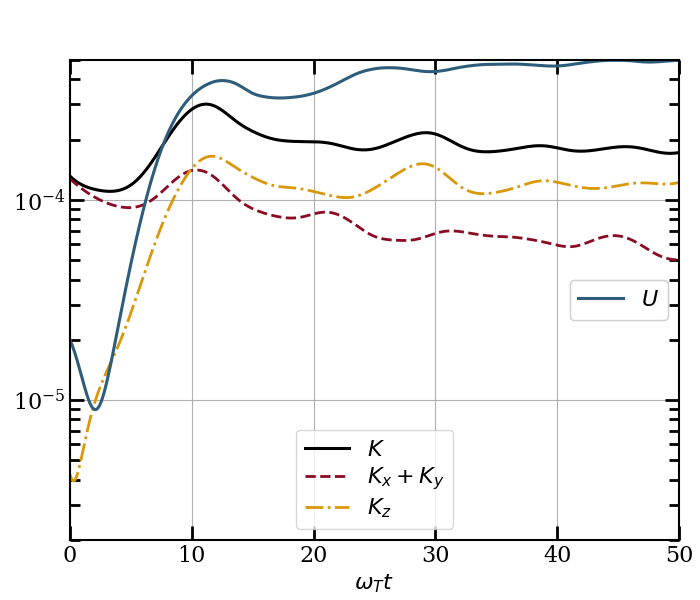

In [2]:

fig, ax = plt.subplots(figsize=(7,6))

line1,=ax.plot(data['t'],   data['ev']           , color=grays(0),label=r'$K$',linewidth=2.2)
line2,=ax.plot(data['t'],   data['Kx']+data['Ky']  , '--', color=colors0[0],label=r'$K_{x}+K_{y}$',linewidth=2.0)
line3,=ax.plot(data['t'],   data['Kz'],  '-.',color=colors0[2],label=r'$K_{z}$ ',linewidth=2.0)
line4,=ax.plot(data['t'],   data['et']/N2,  color=colors0[1],label=r'$U$ ',linewidth=2.2)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel(r'$\omega_T t$',fontsize=16)
#ax.ylabel(r'$L k_R$',fontsize=16)
#ax[0].set_title(r'Kinetic Energy',fontsize=16)
ax.set_yscale('log')
ax.set_ylim(ymin=2e-6,ymax=5e-4)
ax.set_xlim(xmin=0,xmax=50)
# ax.set_xlim(xmin=0,xmax=data['t'][-1])
# ax[0].set_aspect(1.4/ax[0].get_data_ratio())
ax.grid(axis='both',which='major')
legend1=plt.legend(handles=[line1,line2,line3],loc=8,labelspacing=0.2,fontsize=16)
legend2=plt.legend(handles=[line4],loc=7,labelspacing=0.2,fontsize=16)
ax.add_artist(legend1)
ax.add_artist(legend2)

#fig.tight_layout(pad=1.00, h_pad=None, w_pad=None, rect=None)
fig.subplots_adjust(top=0.90,bottom=0.1,left=0.1,right=0.97,wspace=-0.12)
if SAVEFIG:
    fig.savefig(savedir+'Plots/'+'kin_pot_energy.svg',dpi=400,transparent=True,bbox_inches='tight')
    fig.savefig(savedir+'Plots/'+'kin_pot_energy.pdf',dpi=400,transparent=True,bbox_inches='tight')
    fig.savefig(savedir+'Plots/'+'kin_pot_energy.png',dpi=400,transparent=True,bbox_inches='tight')


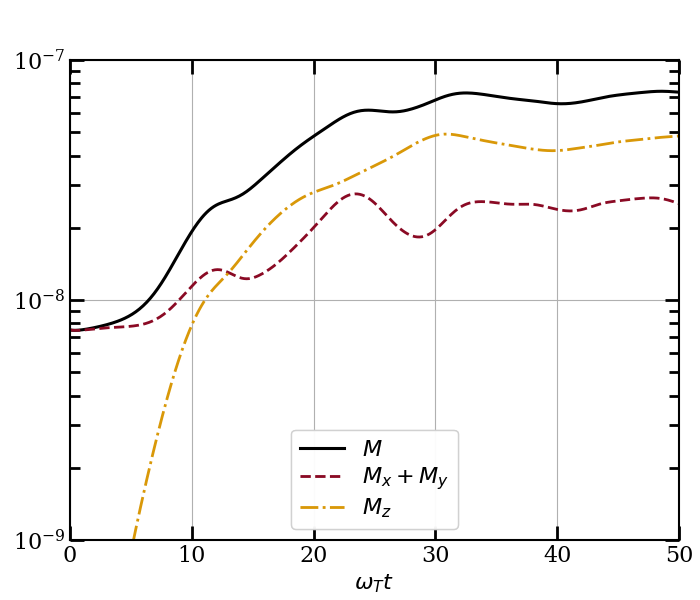

In [3]:

fig, ax = plt.subplots(figsize=(7,6))

line1,=ax.plot(data['t'],   data['em']           , color=grays(0),label=r'$M$',linewidth=2.2)
line2,=ax.plot(data['t'],   data['Mx']+data['My']  , '--', color=colors0[0],label=r'$M_{x}+M_{y}$',linewidth=2.0)
line3,=ax.plot(data['t'],   data['Mz'],  '-.',color=colors0[2],label=r'$M_{z}$ ',linewidth=2.0)
# line4,=ax.plot(data['t'],   data['et']/N2,  color=colors0[1],label=r'$U$ ',linewidth=2.2)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel(r'$\omega_T t$',fontsize=16)
#ax.ylabel(r'$L k_R$',fontsize=16)
#ax[0].set_title(r'Kinetic Energy',fontsize=16)
ax.set_yscale('log')
# ax.set_ylim(ymin=1e-5,ymax=1e-2)
ax.set_ylim(ymin=1e-9,ymax=1e-7)
ax.set_xlim(xmin=0,xmax=50)
# ax.set_xlim(xmin=0,xmax=data['t'][-1])
# ax[0].set_aspect(1.4/ax[0].get_data_ratio())
ax.grid(axis='both',which='major')
legend1=plt.legend(handles=[line1,line2,line3],loc=8,labelspacing=0.2,fontsize=16)
# legend2=plt.legend(handles=[line4],loc=7,labelspacing=0.2,fontsize=16)
ax.add_artist(legend1)
# ax.add_artist(legend2)

#fig.tight_layout(pad=1.00, h_pad=None, w_pad=None, rect=None)
fig.subplots_adjust(top=0.90,bottom=0.1,left=0.1,right=0.97,wspace=-0.12)
if SAVEFIG:
    fig.savefig(savedir+'Plots/'+'mag_energy.svg',dpi=400,transparent=True,bbox_inches='tight')
    fig.savefig(savedir+'Plots/'+'mag_energy.pdf',dpi=400,transparent=True,bbox_inches='tight')
    fig.savefig(savedir+'Plots/'+'mag_energy.png',dpi=400,transparent=True,bbox_inches='tight')
